In [25]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [47]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [27]:
X_test.shape

(10000, 28, 28)

In [28]:
X_train.shape

(60000, 28, 28)

In [29]:
y_train.shape

(60000,)

In [30]:
y_test.shape

(10000,)

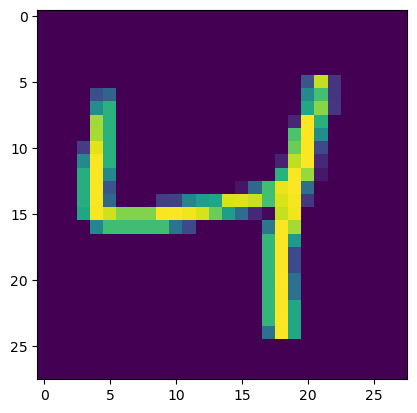

In [31]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [32]:
# we have to convert all values in to 0-1
# so we have to divide by max value 
X_train[0].max()

255

In [33]:
X_train=X_train/255
X_test=X_test/255

In [34]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [35]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [38]:
history=model.fit(X_train,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2876 - accuracy: 0.9199 - val_loss: 0.1551 - val_accuracy: 0.9561
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1321 - accuracy: 0.9609 - val_loss: 0.1189 - val_accuracy: 0.9663
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0901 - accuracy: 0.9728 - val_loss: 0.0965 - val_accuracy: 0.9702
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0666 - accuracy: 0.9807 - val_loss: 0.0994 - val_accuracy: 0.9703
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0509 - accuracy: 0.9844 - val_loss: 0.0895 - val_accuracy: 0.9729
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0411 - accuracy: 0.9872 - val_loss: 0.0883 - val_accuracy: 0.9755
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0320 - accuracy: 0.9903 - val_loss: 0.0879 - val_accuracy:

In [39]:
y_prob=model.predict(X_test)

313/313 [==============================] - 0s 959us/step


In [40]:
y_pred = y_prob.argmax(axis=1)

In [41]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9767

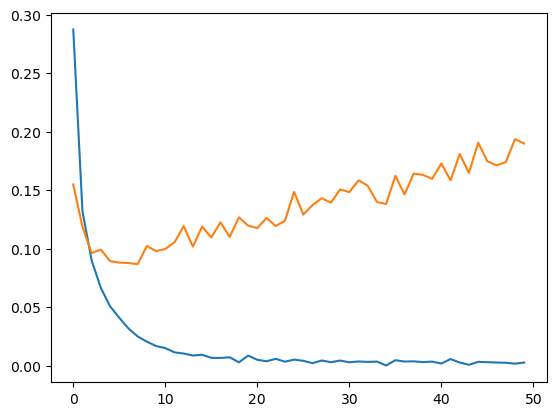

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

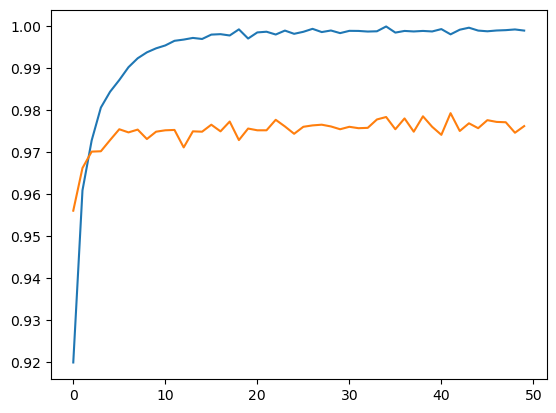

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

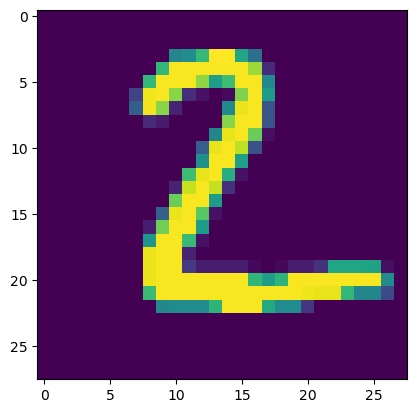

In [45]:
plt.imshow(X_test[1])

In [46]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 20ms/step


array([2], dtype=int64)